In [33]:
import keras
keras.__version__

'2.2.4'

In [0]:
from keras.layers import SimpleRNN

In [0]:
import pandas as pd
import numpy as np
import itertools
from keras.preprocessing import text, sequence
from keras import utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [37]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [38]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_16 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
import pandas as pd
import numpy as np
df=pd.read_json("Team11_Boeing.json")

In [40]:
df.head(5)

,sentiment,text
1,Neutral,Could you catch us up on your latest thinking ...
10,Neutral,We continue to ramp up the activities for the ...
100,Negative,"Yes, it was sort of just how the conversation ..."
101,Neutral,"Yes, we have talked extensively with customers..."
102,Neutral,Next we go to Ron Epstein with Bank of America...


In [41]:
df['sentiment'].value_counts()

Neutral     117
Positive      8
Negative      4
Name: sentiment, dtype: int64

In [42]:
train_size = int(len(df) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 103
Test size: 26


In [0]:
train_posts = df['text'][:train_size]
train_tags = df['sentiment'][:train_size]

test_posts = df['text'][train_size:]
test_tags = df['sentiment'][train_size:]

In [0]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [0]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [0]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [0]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [49]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (103, 1000)
x_test shape: (26, 1000)
y_train shape: (103, 3)
y_test shape: (26, 3)


In [0]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# You can try tweaking these hyperparamaters when using this model with your own data
batch_size = 32
epochs = 2

In [55]:
#from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# print('Loading data...')
# (input_train, y_train), (input_test, y_test) = df.load_data(num_words=max_features)
# print(len(input_train), 'train sequences')
# print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(x_train, maxlen=maxlen)
input_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('input_train shape:', x_train.shape)
print('input_test shape:', x_test.shape)

Pad sequences (samples x time)
input_train shape: (103, 1000)
input_test shape: (26, 1000)


In [56]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 82 samples, validate on 21 samples
Epoch 1/10
82/82 [==============================] - 1s 16ms/step - loss: 0.7064 - acc: 0.6138 - val_loss: 0.6216 - val_acc: 0.3651
Epoch 2/10
82/82 [==============================] - 0s 1ms/step - loss: 0.6176 - acc: 0.3618 - val_loss: 0.5667 - val_acc: 0.9365
Epoch 3/10
82/82 [==============================] - 0s 1ms/step - loss: 0.5578 - acc: 0.9756 - val_loss: 0.5265 - val_acc: 0.9365
Epoch 4/10
82/82 [==============================] - 0s 1ms/step - loss: 0.5134 - acc: 0.9756 - val_loss: 0.4964 - val_acc: 0.9365
Epoch 5/10
82/82 [==============================] - 0s 1ms/step - loss: 0.4796 - acc: 0.9756 - val_loss: 0.4717 - val_acc: 0.9365
Epoch 6/10
82/82 [==============================] - 0s 1ms/step - loss: 0.4517 - acc: 0.9756 - val_loss: 0.4504 - val_acc: 0.9365
Epoch 7/10
82/82 [==============================] - 0s 1ms/step - loss: 0.4273 - acc: 0.9756 - val_loss: 0.4315 - val_acc: 0.9365
Epoch 8/10
82/82 [===========================

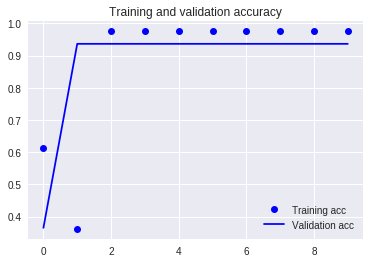

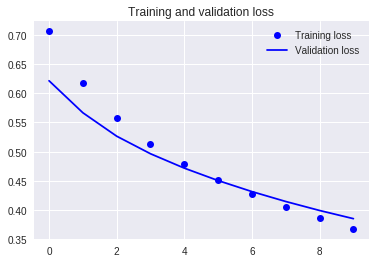

In [57]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [59]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 82 samples, validate on 21 samples
Epoch 1/10
82/82 [==============================] - 3s 31ms/step - loss: 0.6955 - acc: 0.6504 - val_loss: 0.6802 - val_acc: 0.9365
Epoch 2/10
82/82 [==============================] - 1s 10ms/step - loss: 0.6792 - acc: 0.9715 - val_loss: 0.6678 - val_acc: 0.9365
Epoch 3/10
82/82 [==============================] - 1s 10ms/step - loss: 0.6659 - acc: 0.9715 - val_loss: 0.6545 - val_acc: 0.9365
Epoch 4/10
82/82 [==============================] - 1s 10ms/step - loss: 0.6517 - acc: 0.9756 - val_loss: 0.6387 - val_acc: 0.9365
Epoch 5/10
82/82 [==============================] - 1s 10ms/step - loss: 0.6346 - acc: 0.9756 - val_loss: 0.6185 - val_acc: 0.9365
Epoch 6/10
82/82 [==============================] - 1s 10ms/step - loss: 0.6128 - acc: 0.9756 - val_loss: 0.5908 - val_acc: 0.9365
Epoch 7/10
82/82 [==============================] - 1s 10ms/step - loss: 0.5829 - acc: 0.9756 - val_loss: 0.5510 - val_acc: 0.9365
Epoch 8/10
82/82 [=====================

In [62]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

26/26 [==============================] - 0s 3ms/step
Test score: 0.4825204014778137
Test accuracy: 0.8205128312110901


In [63]:
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_posts.iloc[i][:50], "...")
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label + "\n")

Yes. So obviously, we will manage that extremely t ...
Actual label:Neutral
Predicted label: Neutral

All included in that. ...
Actual label:Neutral
Predicted label: Neutral

All included. Absolutely, yes. ...
Actual label:Positive
Predicted label: Neutral

And your Unit 2 program, you got it, you right on  ...
Actual label:Neutral
Predicted label: Neutral

Continued healthy sales activity contributed to 89 ...
Actual label:Neutral
Predicted label: Neutral

And next we go to Douglas Harned with Bernstein. P ...
Actual label:Neutral
Predicted label: Neutral

I wanted to continue on the 787. And just to under ...
Actual label:Negative
Predicted label: Neutral

Next question from Seth Seifman with JPMorgan. Ple ...
Actual label:Positive
Predicted label: Neutral

So you mentioned the idea of, I think, trying to b ...
Actual label:Negative
Predicted label: Neutral

Seth, we’re working both in parallel. Certainly du ...
Actual label:Positive
Predicted label: Neutral



In [0]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [0]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

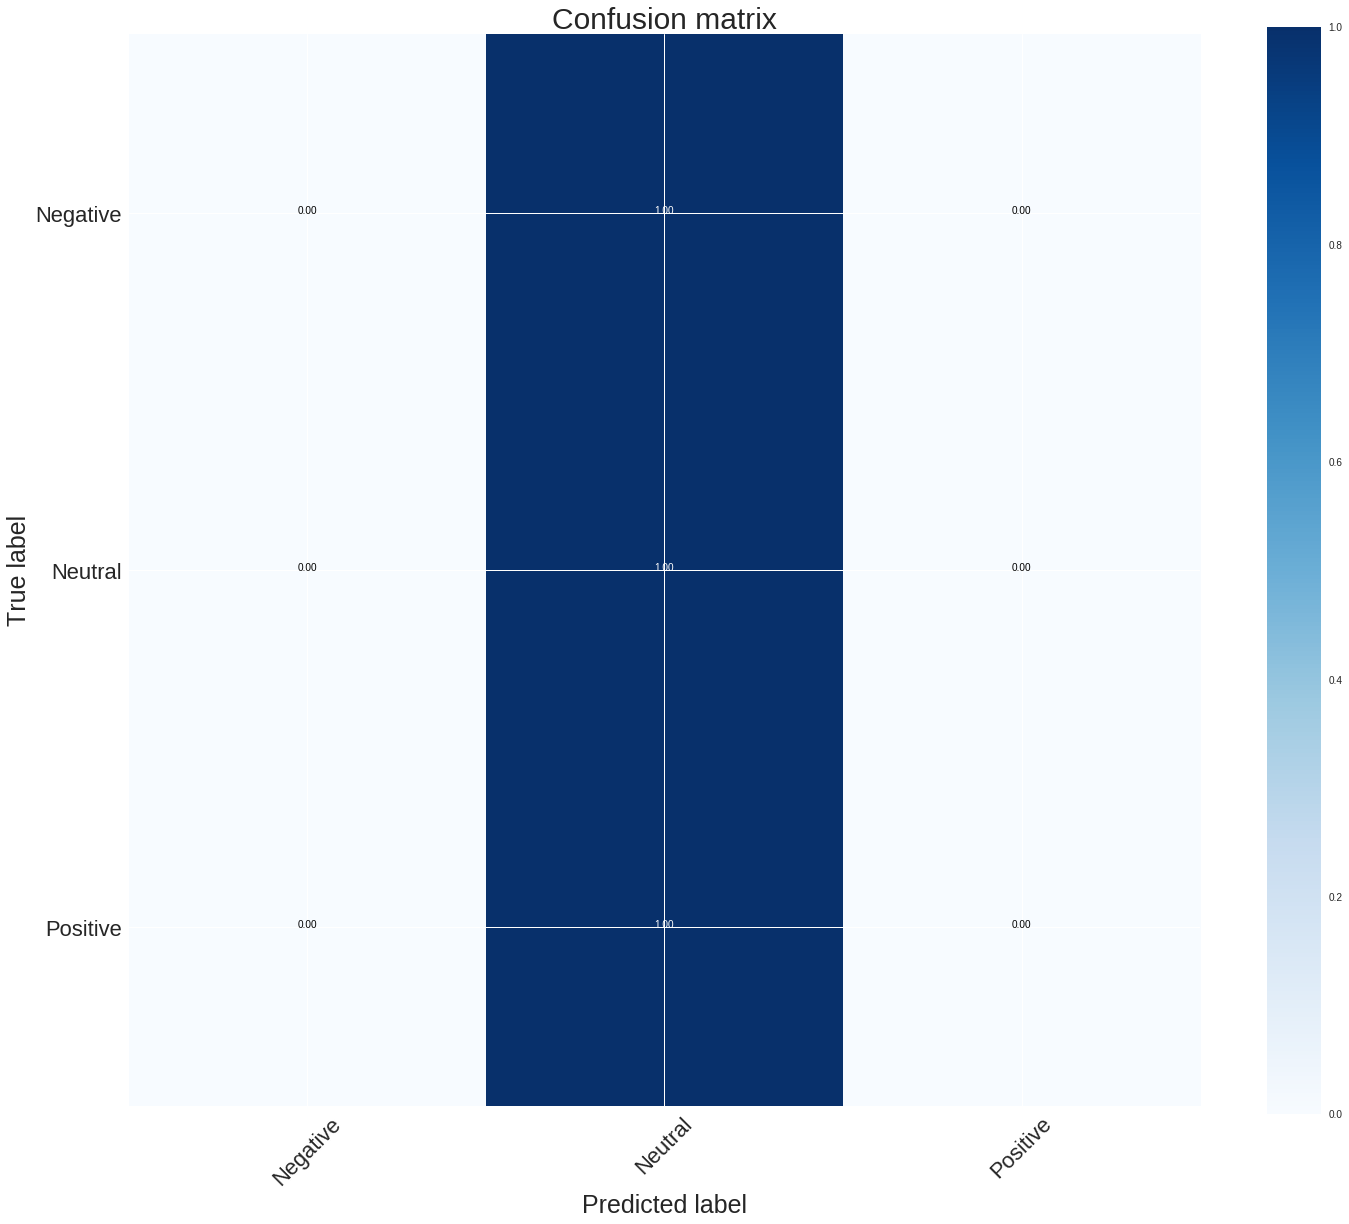

In [66]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()